In [1]:
from LNN import *

from scipy.stats import lognorm
from scipy.spatial.distance import cosine

# matplotlib settings
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 8, # fontsize for x and y labels (was 10)
    'axes.titlesize': 8,
    'font.size': 8, # was 10
    'legend.fontsize': 6, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

colors = ['#377eb8', '#ff7f00', '#4daf4a', 
          '#f781bf', '#a65628', '#984ea3', 
          '#999999', '#e41a1c', '#dede00',
          '#006BA4', '#FF800E', '#ABABAB', 
          '#595959', '#5F9ED1', '#C85200',
          '#898989', '#A2C8EC', '#FFBC79', 
          '#CFCFCF']

In [2]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

In [3]:
def unstruct_weight_plot_mu(Ns, mus, sigma, repetitions, design='lognormal',
                         v=None, sigmaM=1., sigmaS=1., sigmaC=1., nonlinearity='squared', s=1., ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (8, 8))
        ax = fig.add_subplot(111)
    # create data arrays
    data = np.zeros((len(Ns), len(mus), repetitions))
    # iterate over scales
    for N_idx, N in enumerate(Ns):
        for mu_idx, mu in enumerate(mus):
            # iterate over repetitions
            for rep in range(repetitions):
                v = np.ones(N)
                w = 1. + LNN.unstruct_weight_maker(N, design, loc=mu, scale=sigma)
                lnn = LNN(v=v, w=w, nonlinearity=nonlinearity,
                     sigmaM=sigmaM, sigmaS=sigmaS, sigmaC=sigmaC)
                data[N_idx, mu_idx, rep] = lnn.FI_squared_nonlin(s=s)
                data_means = np.mean(data[N_idx, :, :], axis=1)
                data_stdevs = np.std(data[N_idx, :, :], axis=1)
        ax.plot(mus, data_means, color=colors[N_idx], linestyle='-', linewidth=4, zorder=10, label=r'$N = %s$' %N)
        ax.fill_between(mus, data_means - data_stdevs, data_means + data_stdevs, color=colors[N_idx], alpha=0.50)
    ax.set_facecolor('white')
    ax.set_xlabel(r'$\mu$', fontsize=30)
    ax.tick_params(labelsize=20)
    lgd = ax.legend(loc = 4, facecolor='white', prop={'size' : 10}, ncol=4)
    lgd.get_frame().set_edgecolor('k')
    for spine in ax.spines.values():
        spine.set_edgecolor('k')
    return ax

In [7]:
def plot_fisher_nonlinear_2d(N, ratios, mus, sigma, reps, v=None, s=1., typ=1, colors=colors,
                            ax=None):
    # create plot
    if ax is None:
        fig = plt.figure(figsize = (10, 8))
        ax = fig.add_subplot(111)
    if v is None:
        v = np.ones(N)
    fishers = np.zeros((ratios.size, mus.size, reps))
    avg_fishers = np.zeros((ratios.size, mus.size))
    for ratio_idx, ratio in enumerate(ratios):
        sigmaC = 1
        sigmaM = ratio * sigmaC
        for mu_idx, mu in enumerate(mus):
            for rep in range(reps):
                v = np.ones(N)
                w = 1. + LNN.unstruct_weight_maker(N, 'lognormal', loc=mu, scale=sigma)
                lnn = LNN(v=v, w=w, nonlinearity='squared',
                     sigmaM=sigmaM, sigmaS=1, sigmaC=sigmaC)
                fishers[ratio_idx, mu_idx, rep] = lnn.FI_squared_nonlin(s)
            avg_fishers[ratio_idx, mu_idx] = np.mean(fishers[ratio_idx, mu_idx, :])
        avg_fishers[ratio_idx, :] = avg_fishers[ratio_idx, :]/np.max(avg_fishers[ratio_idx, :])
    ax.grid(False)
    img = ax.imshow(avg_fishers.T, interpolation='spline36', vmin=0, vmax=1)
    ax.tick_params(labelsize=20)
    return img

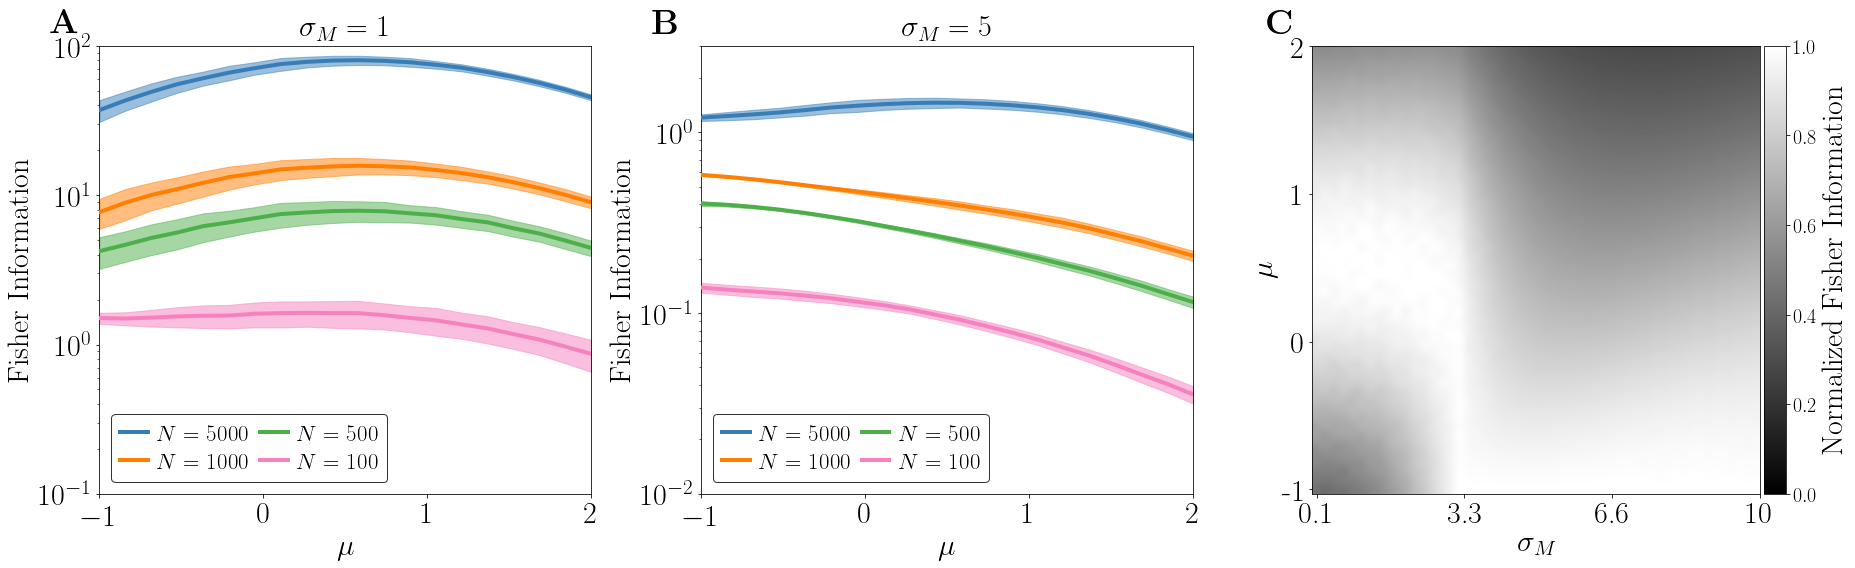

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(26,8))

unstruct_weight_plot_mu(Ns=[5000, 1000, 500, 100], mus=np.linspace(-1, 2, 20), sigma=1., sigmaM = 1., repetitions=1000, ax=axes[0])
axes[0].set_xlim([-1, 2])
axes[0].tick_params(labelsize=30)
axes[0].set_xlabel(r'$\mu$', fontsize=30)
axes[0].set_ylabel(r'Fisher Information', fontsize=30)
axes[0].set_title('')
lgd0 = axes[0].legend(ncol=2,
                    facecolor='white', 
                    prop={'size' : 23}, 
                    handletextpad=0.4,
                    handlelength=1.2,
                    labelspacing=0.27,
                    columnspacing=0.50)
lgd0.get_frame().set_edgecolor('k')
axes[0].text(x=-0.1, y=1.05, s=r'\textbf{A}', fontsize=35, verticalalignment='center', transform=axes[0].transAxes)
axes[0].set_yscale('log')
axes[0].set_title(r'$\sigma_M=1$', fontsize=30)
axes[0].set_ylim([0.1, 100])

unstruct_weight_plot_mu(Ns=[5000, 1000, 500, 100], mus=np.linspace(-1, 2, 20), sigma=1., sigmaM = 5., repetitions=1000, ax=axes[1])
axes[1].set_xlim([-1, 2])
axes[1].tick_params(labelsize=30)
axes[1].set_xlabel(r'$\mu$', fontsize=30)
axes[1].set_ylabel(r'Fisher Information', fontsize=30)
lgd1 = axes[1].legend(ncol=2,
                    facecolor='white', 
                    prop={'size' : 23}, 
                    handletextpad=0.4,
                    handlelength=1.2,
                    labelspacing=0.27,
                    columnspacing=0.50)
lgd1.get_frame().set_edgecolor('k')
axes[1].text(x=-0.1, y=1.05, s=r'\textbf{B}', fontsize=35, verticalalignment='center', transform=axes[1].transAxes)
axes[1].set_title(r'$\sigma_M=5$', fontsize=30)
axes[1].set_yscale('log')
axes[1].set_ylim([0.01, 3])

ratios = np.linspace(0.1, 10, 50)
mus=np.linspace(-1, 2, 50)
img = plot_fisher_nonlinear_2d(1000, ratios, mus, sigma=1, reps=500, ax=axes[2])
axes[2].set_xlabel(r'$\sigma_M$', fontsize=30)
axes[2].set_ylabel(r'$\mu$', fontsize=30)
axes[2].tick_params(labelsize=30)
axes[2].set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes[2].set_yticklabels(np.arange(1, 11))
axes[2].set_yticks(mus.size * np.array([0, 0.33, 0.66, 0.99]))
axes[2].set_yticklabels([-1, 0, 1, 2])
axes[2].set_xticks(ratios.size * np.array([0, 0.33, 0.66, 0.99]))
axes[2].set_xticklabels([0.1, 3.3, 6.6, 10])
axes[2].text(x=-0.1, y=1.05, s=r'\textbf{C}', fontsize=35, verticalalignment='center', transform=axes[2].transAxes)
axes[2].axis('equal')
cb = colorbar(img)
cb.ax.set_ylabel(r'Normalized Fisher Information', fontsize=30)
cb.ax.tick_params(labelsize=20)
cb.ax.set_ylim([0, 1])
plt.tight_layout(rect=[0, 0.0, 1, 0.98])
plt.savefig('figure4.pdf')